In [4]:
import numpy as np
import CaGD_log
import matplotlib.pyplot as plt

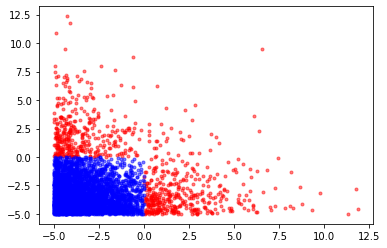

In [5]:
N = 5000
n = 2

# COMMENT/UNCOMMENT THE RESPECTIVE PART TO OBTAIN THE WANTED EXPERIMENT

###### EXPERIMENT A
# X = np.random.uniform(-1, 1., (N,n))
# Y = np.zeros(N)
# Y[X[:,1]>np.sin(np.pi*X[:,0])] = 1.
########################

###### EXPERIMENT B
# X = np.random.exponential(2., (N,n))-5
# tmp = X<0
# tmp = np.all(tmp,1)
# Y = np.zeros(N)
# Y[tmp] = 1
########################

###### EXPERIMENT C
X = np.random.uniform(-1, 1., (N,n))
theta_star = [-5,2]
tmp = np.random.uniform(size=N)
Y = np.dot(X,theta_star)
Y = np.divide(1,1-np.exp(-Y)).T
Y[tmp>Y] = -1.
Y[tmp<=Y] = 0.
Y= np.abs(Y)
########################

plt.plot(X[Y==0,0],X[Y==0,1],'r.',alpha=0.5)
plt.plot(X[Y==1,0],X[Y==1,1],'b.',alpha=0.5)
# plt.savefig('logistic_5000.pdf', bbox_inches='tight')
plt.show()

In [6]:
# COMMENT/UNCOMMENT THE RESPECTIVE PART TO OBTAIN THE WANTED EXPERIMENT

step = np.linspace(1e-4,1e-2,4)
error = 1e-3 
max_it = 1e4 
sample = 2
n = 2
N = [5000,10000,50000,100000]

err = np.zeros([len(step), len(N), sample])
err_CA = np.zeros([len(step), len(N), sample])
t = np.zeros([len(step), len(N), sample])
t_CA = np.zeros([len(step), len(N), sample])

for i in range(len(step)):
    for j in range(len(N)):
        for k in range(sample):
            print("###########################################################")
            print("step = ", step[i], " N = ", N[j], " sample = ", k)
            
            ###### EXPERIMENT A
#             X = np.random.uniform(-1, 1., (N[j],n))
#             Y = np.zeros(N[j])
#             Y[X[:,1]>np.sin(np.pi*X[:,0])] = 1.

            ###### EXPERIMENT B
#             X = np.random.exponential(2., (N[j],n))-5
#             tmp = X<0
#             tmp = np.all(tmp,1)
#             Y = np.zeros(N[j])
#             Y[tmp] = 1
            
            ###### EXPERIMENT C
            X = np.random.uniform(-1, 1., (N[j],n))
            theta_star = [-5,2]
            tmp = np.random.uniform(size=N[j])
            Y = np.dot(X,theta_star)
            Y = np.divide(1,1-np.exp(-Y)).T
            Y[tmp>Y] = -1.
            Y[tmp<=Y] = 0.
            Y= np.abs(Y)

            ###################

            theta_0 = np.random.uniform(-1/n**0.5,1/n**0.5,size=n)
            
            err[i,j,k],iteration,theta,t[i,j,k] = CaGD_log.gd_log(X,Y,theta_0,step[i],error,max_it)
            print("###########################################################")
            err_CA[i,j,k], iteration_CA, theta_CA, t_CA[i,j,k] = CaGD_log.gd_log_CA(X,Y,theta_0,step[i],err[i,j,k],max_it)
        

###########################################################
step =  0.0001  N =  5000  sample =  0
iteration  100  | norm of the gradient =  1.0387232491045058
iteration  200  | norm of the gradient =  1.005982272356223
iteration  300  | norm of the gradient =  0.9750893771283188
iteration  400  | norm of the gradient =  0.9459114805445029
iteration  500  | norm of the gradient =  0.9183258180860263
iteration  600  | norm of the gradient =  0.8922192752089866
iteration  700  | norm of the gradient =  0.8674877071379238
iteration  800  | norm of the gradient =  0.8440352676193201
iteration  900  | norm of the gradient =  0.8217737604965634
iteration  1000  | norm of the gradient =  0.8006220228883314
iteration  1100  | norm of the gradient =  0.780505345074206
iteration  1200  | norm of the gradient =  0.761354929568657
iteration  1300  | norm of the gradient =  0.7431073900299534
iteration  1400  | norm of the gradient =  0.7257042893988056
iteration  1500  | norm of the gradient =  0.

/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official GD/recombination.py:368: RuntimeWarning: invalid value encountered in less_equal
  tmp_1 = np.transpose(AX<=0)


iteration  113.0746000000001  | norm of the gradient after a full iteration =  0.0954286252514247
iterations done with the reduced measure =  2
iteration  114.07520000000011  | norm of the gradient after the acceleration procedure =  0.0954210523980732
iteration  115.07520000000011  | norm of the gradient after a full iteration =  0.09541348033987007
iterations done with the reduced measure =  2
iteration  116.07580000000011  | norm of the gradient after the acceleration procedure =  0.09540590907670075
iteration  117.07580000000011  | norm of the gradient after a full iteration =  0.09539833860845115
iterations done with the reduced measure =  2
iteration  118.07640000000012  | norm of the gradient after the acceleration procedure =  0.0953907689350063
iteration  119.07640000000012  | norm of the gradient after a full iteration =  0.09538320005625156
iterations done with the reduced measure =  2
iteration  120.07700000000013  | norm of the gradient after the acceleration procedure =  

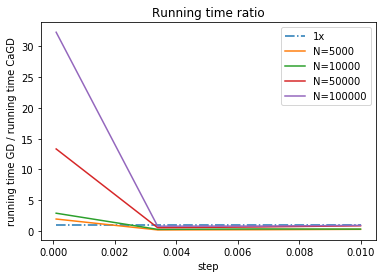

In [8]:
x = step
y = np.mean(t,axis=2).T
y_CA = np.mean(t_CA,axis=2).T

plt.plot(x, np.ones(len(x)), '-.', label="1x")
plt.plot(x, y[0,:]/y_CA[0,:], label="N=%d"%(N[0]))
plt.plot(x, y[1,:]/y_CA[1,:], label="N=%d"%(N[1]))
plt.plot(x, y[2,:]/y_CA[2,:], label="N=%d"%(N[2]))
plt.plot(x, y[3,:]/y_CA[3,:], label="N=%d"%(N[3]))
# plt.xscale('log')
plt.legend() 
plt.title('Running time ratio')
plt.xlabel('step')
plt.ylabel('running time GD / running time CaGD')
# plt.savefig('gd_ratio_generated_log_2sample.pdf', bbox_inches='tight')
plt.show()